### i. INTRODUCTION

Name : Nisrina Tsany Sulthanah

Batch : FTDS - RMT038

**Dataset Description :** The dataset used in this analysis, named Churn_Modelling.csv, consists of customer-related information from a bank. This data is structured to help identify factors influencing customer churn, where churn refers to customers leaving the bank's services.
- Dataset Size: 10,000 rows (customers) and 14 columns
- About the column :
    - RowNumber, CustomerId, Surname: Identification-related features. These were not included in the model training but retained for referencing customer identity in the final predictions (they're just like unique value)
    - CreditScore: Customer's credit score
    - Geography: Customer's country (France, Spain, Germany)
    - Gender: Male or Female
    - Age: Customer's age
    - Tenure: Number of years the customer has been with the bank
    - Balance: Customer's account balance
    - NumOfProducts: Number of products (e.g., loans, savings) the customer uses
    - HasCreditCard: Binary indicator (1 = Yes, 0 = No) of whether the customer has a credit card
    - IsActiveMember: Binary indicator (1 = Active, 0 = Inactive) of whether the customer is an active bank member
    - EstimatedSalary: Customer's estimated annual salary
    - Exited: Used as target variable (1 = Churned, 0 = Retained)
- url dataset = https://www.kaggle.com/datasets/saurabhbadole/bank-customer-churn-prediction-dataset

**Background :** In the competitive banking industry, maintaining customer loyalty is challenging due to evolving expectations and attractive offers from competitors. Customer churn leads to significant financial losses and can harm the bank's reputation. Churn often happens due to dissatisfaction with services, high fees, or better offerings elsewhere. A data-driven predictive model can identify at-risk customers early, enabling the bank to take proactive actions like personalized offers, improved support, and enhanced engagement programs to retain customers and minimize churn.

**Objectives :** 
- To build an effective machine learning model to accurately predict customer churn (customers who are likely to leave the bank). By predicting churn early, the bank can proactively improve retention strategies. Five models were used: KNN, SVC, Decision Tree, Random Forest, and XGBoost, chosen for their ability to handle diverse data and provide accurate predictions.
- The F1 Score was selected as the main metric because it balances precision and recall, making it ideal for imbalanced datasets like churn prediction. Cross-validation was used to calculate the mean and standard deviation of the F1 Score, ensuring model robustness.
- To address class imbalance, SMOTE was applied, and hyperparameter tuning was done using GridSearchCV, focusing on the XGBoost model for optimal performance.
- The model and insights are intended for bank management teams responsible for customer retention strategies, marketing teams, and business analysts

### ii. IMPORT LIBRARIES

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from scipy.stats import f_oneway, pointbiserialr
from sklearn.feature_selection import mutual_info_classif
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import make_scorer
from scipy.stats import zscore
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder, MinMaxScaler, OneHotEncoder, FunctionTransformer
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
import cloudpickle
import json
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

### iii. DATA LOADING

Load the data from csv file and save it as df. Then, display the head of the data.

In [2]:
# Load dataset
df = pd.read_csv('Churn_Modelling.csv')  
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


From the dataset table, it can be seen that there are columns containing what I mentioned in the dataset description in the introduction section. Then, check the info from the dataset.

In [3]:
#Check dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


There we can see the names of the columns in the dataset where there are no missing values ​​and what the data type for each column is, which corresponds to the contents of each column. Then, check the basic statistic of dataset.

In [4]:
#check basic statistic
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


The dataset statistics reveal key information about the features:
- RowNumber and CustomerId: These are identification columns with no impact on predictions. Used only for reference, not included in the training.
- CreditScore: Mean of 650.53 with a standard deviation of 96. Range in 350 to 850, indicating variability in customer creditworthiness.
- Age: Mean is 38.92 years, with customers ranging from 18 to 92 years old. High variance might suggest diverse customer demographics.
- Tenure: Mean is 5.01 years, ranging from 0 to 10 years. Reflects varying customer loyalty durations.
- Balance: Mean is $76,485.89, with some customers having $0 balance while others reach $250,898. Customers with $0 balance may indicate inactive accounts.
- NumOfProducts: Mean 1.53, indicating most customers use 1 or 2 products. Max of 4 products.
- HasCrCard: Binary feature (0/1) with a mean of 0.71. Indicates 71% of customers have a credit card.
- IsActiveMember: Binary feature (0/1) with a mean of 0.52. Indicates 52% of customers are actively engaged with the bank.
- EstimatedSalary: Mean $100,090, with a wide range from $11.58 to $199,992. Suggests diverse income levels among customers.
- Exited: Target variable with a mean of 0.20. Indicates that 20% of customers have churned.

In [5]:
# count the number of duplication of data
print(f"number of duplicates: {df.duplicated().sum()}")

number of duplicates: 0


There is no duplicate data in the dataset.

In [6]:
# check missing values 
print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


There is no missing values detected in the dataset in each column. Value 0 in some column such as balance and tenure has information so it's not a part of missing values that has to be handled.

In [7]:
# Rename 'HasCrCard' column to 'HasCreditCard'
df.rename(columns={'HasCrCard': 'HasCreditCard'}, inplace=True)


Before proceeding to the EDA and feature engineering process, change the column name from HasCrCard to HasCreditCard to make it clearer.

### iv. EXPLORATORY DATA ANALYSIS (EDA)

#### A. Churn Analysis: Proportion and Count of Exited Customers

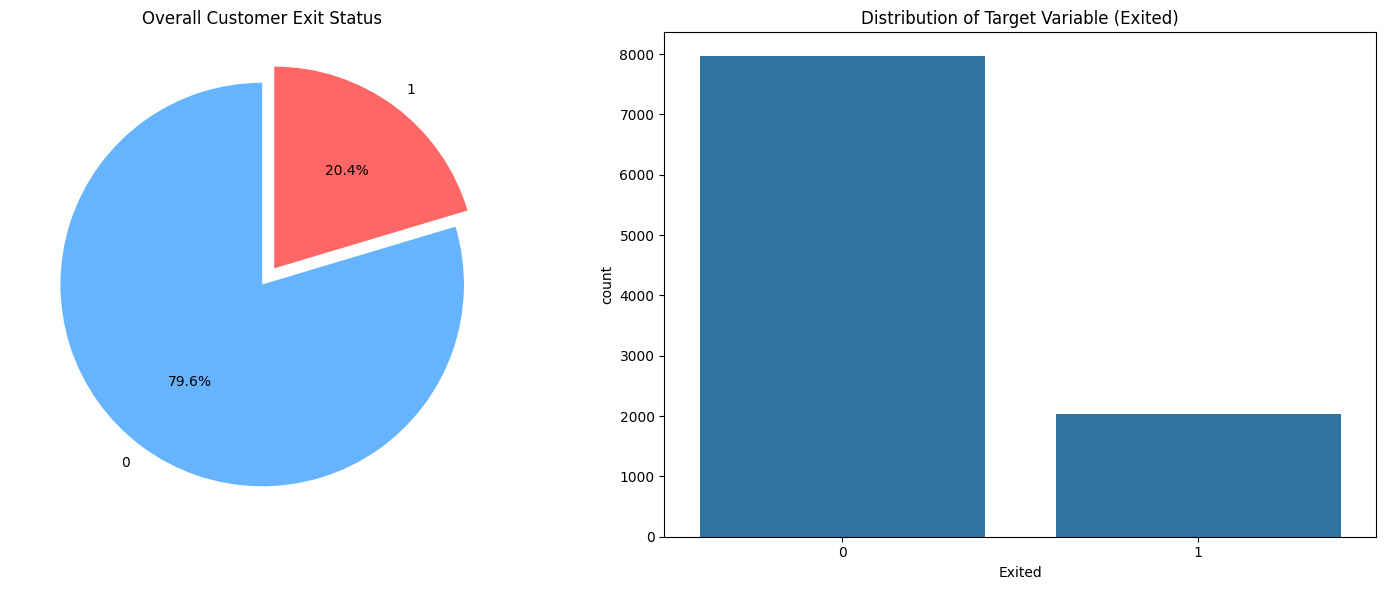

In [8]:
# Creating subplots with 2 columns (1 row)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Visualization 1: Pie chart for overall Exited distribution
df['Exited'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, 
                                   colors=['#66b3ff', '#ff6666'], explode=(0, 0.1), ax=axes[0])
axes[0].set_title('Overall Customer Exit Status')
axes[0].set_ylabel('')  # Removing the y-axis label

# Visualization 2: Countplot for the distribution of target variable Exited
sns.countplot(x='Exited', data=df, ax=axes[1])
axes[1].set_title('Distribution of Target Variable (Exited)')

# Displaying both visualizations in one figure
plt.tight_layout()
plt.show()


- The pie chart in the left shows the proportion of customers who exited (churned) versus those who did not exit. 79.6% of customers did not churn (label 0), while 20.4% of customers churned (label 1). This indicates a significant class imbalance, where the majority of customers remain with the service.
- The bar plot confirms the same imbalance: Around 8000 customers belong to the "No Exit" category (0). Approximately 2000 customers belong to the "Exit" category (1).
- Class Imbalance: The dataset is imbalanced, with far fewer customers who churned (20.4%) compared to those who stayed (79.6%). This imbalance can affect machine learning models by making them biased towards the majority class (No Exit).


#### B. Age Distribution Chart

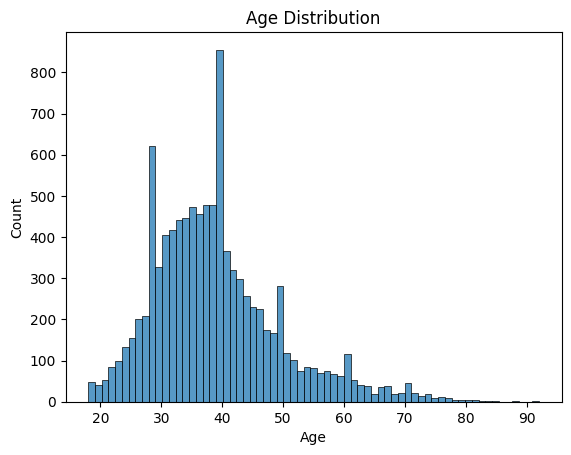

In [9]:
# Age distribution
sns.histplot(df['Age'])
plt.title('Age Distribution')
plt.show()

- The age distribution is right-skewed (positively skewed), meaning that most customers are concentrated in the younger age range, with a gradual decline as age increases.
- There are notable peaks around 30 years and 40 years, indicating these age groups have the highest customer counts.
- The majority of customers are between the ages of 30 and 50, with 40 years old being the most common.
- After age 50, the number of customers declines significantly, indicating fewer older customers in the dataset.
- Very few customers are above 70 years, which could mean the product/service appeals more to younger or middle-aged individuals.

> Targeted Marketing: Focus marketing efforts on age groups that form the majority of customers (30–50 years). Prioritize retention strategies for customers in the dominant age ranges.

#### C. Density Distribution of Age by Gender

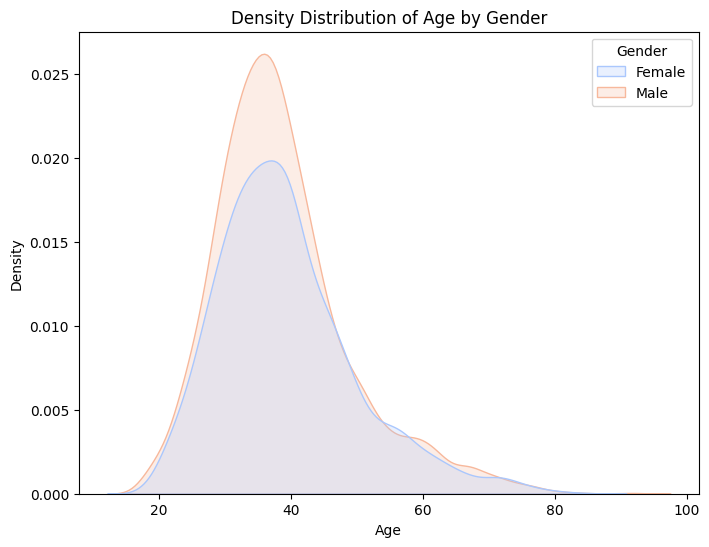

In [10]:
# Density Plot Visualization for Age based on Gender
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='Age', hue='Gender', fill=True, palette='coolwarm')
plt.title('Density Distribution of Age by Gender')
plt.show()


- The distribution of age for both male and female customers is right-skewed (positively skewed).
- Most customers fall between the ages of 30 and 40, with the density decreasing gradually as age increases.
- The male distribution has a slightly higher peak, indicating that males are more concentrated around the age of 35–40.
- The female distribution shows a similar trend but with a slightly broader spread.
- Age Concentration: The majority of customers for both genders are concentrated in the 30–40 year age range. This age group appears to be the key demographic.
- Slight Gender Difference: While the age distributions are very similar, males appear to have a slightly sharper concentration around the peak age compared to females.

> strategic recommendations: Leverage targeted marketing strategies based on age and gender insights to improve campaign effectiveness and engagement. Introduce products tailored to specific age and gender groups, such as flexible savings plans for younger customers and investment portfolios for older ones.

#### D. Analysis of the Chart: Average Age by Gender

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15512\3558735132.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Age', data=gender_age_avg, palette='coolwarm')


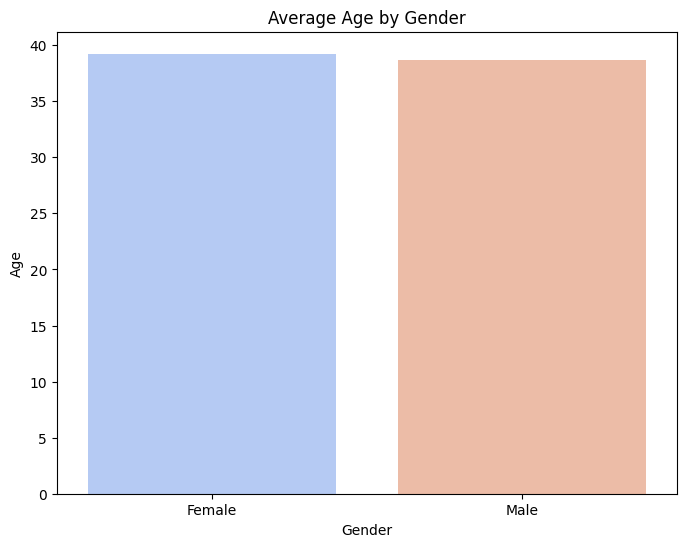

In [11]:
# Calculating Age statistics based on Gender
gender_age_avg = df.groupby('Gender')['Age'].mean().reset_index()

# Bar Chart Visualization
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Age', data=gender_age_avg, palette='coolwarm')
plt.title('Average Age by Gender')
plt.show()


- The average age for Female and Male customers is almost the same, both around 39 years.
- There is no significant difference between the two groups in terms of average age.
- The similar average age for both genders suggests that the product or service appeals equally to both males and females in the 39-year age range.
- This indicates that age is not a differentiating factor between genders in this dataset.

> Marketing strategies or retention plans do not need to focus on gender-specific age differences, as both male and female customers share a similar age profile. Businesses can target the average age group of 39 years more effectively for campaigns or services that cater to this demographic.

#### E. Age Distribution by Exited (Churn Status)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15512\2878146742.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='Age', data=df, palette='coolwarm')


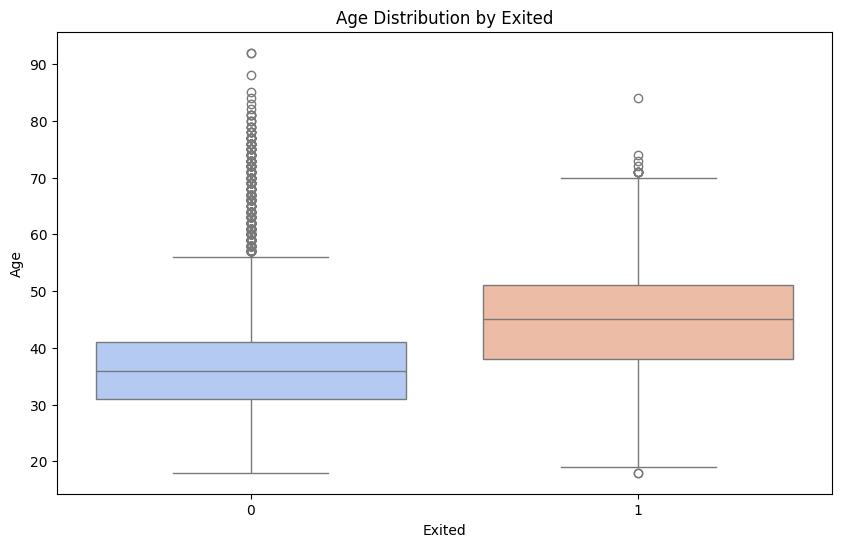

In [12]:
# Visualization of age distribution (Age) based on exit status (Exited)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Age', data=df, palette='coolwarm')
plt.title('Age Distribution by Exited')
plt.show()

- The majority of customers who did not churn are between the ages of 30 to 40. There are a significant number of outliers above age 55, indicating older customers who stayed but are not the majority. 
- Customers who churned tend to be older, with the age range concentrated between 40 and 50. There are fewer younger customers (below 30) in the churn group. There are also some outliers, particularly customers aged above 70, who churned.
- Both groups have some outliers in older ages (above 70), but they are more prominent in the churn group.

> Younger customers appear to be more stable, suggesting they may already be satisfied or engaged with the product/service. Focus retention strategies on older customers (40+), as they show a higher likelihood of churning.

#### F. Analysis of Credit Score vs Exited (Churn Status)

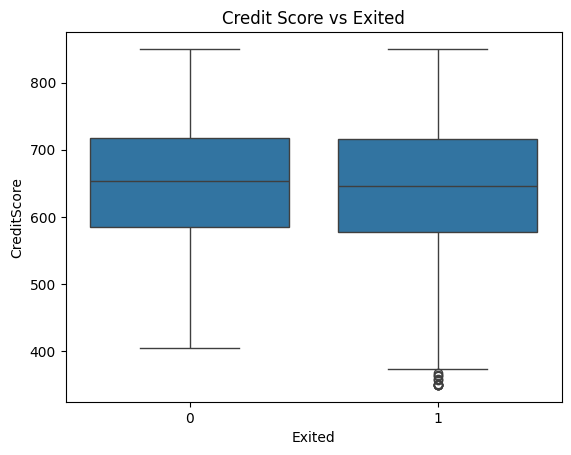

In [13]:
# CreditScore vs Exited (Target variable)
sns.boxplot(x='Exited', y='CreditScore', data=df)
plt.title('Credit Score vs Exited')
plt.show()

- The median Credit Score for both churned customers (Exited = 1) and non-churned customers (Exited = 0) is similar, around 650.
- In Churn Group (Exited = 1) shows that:
    - There are lower outliers below 400, which indicates that some customers with very low credit scores tend to churn.
    - The credit score distribution for churned customers appears slightly wider, with a few lower extreme values.
- In Non-Churn Group (Exited=0) shows that:
    - The credit score distribution is tighter and slightly skewed towards higher credit scores compared to the churn group.
- Credit score alone does not appear to be a strong differentiator between churned and non-churned customers, as the medians and interquartile ranges are quite similar.
- However, customers with very low credit scores (outliers below 400) are more likely to churn.

> Customers with extremely low credit scores may need special attention, as they are more prone to churn.

#### G. Analysis of Balance vs Exited (Churn Status)

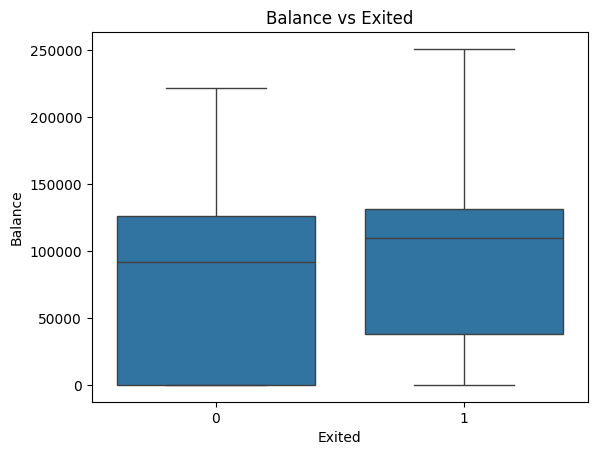

In [14]:
# Balance vs Exited
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title('Balance vs Exited')
plt.show()

- Non-Churn Group (Exited = 0):
    - Many customers have a balance closer to zero, with the median balance around 100,000.
    - The data shows a wide range of balances, but there is a large concentration of customers with low balances.
    - Low Balance Customers Tend to Stay: Non-churn customers have a higher concentration of very low balances, possibly indicating they have minimal engagement or no strong incentives to leave.
- Churn Group (Exited = 1):
    - The median balance is slightly higher compared to the non-churn group.
    - There is a noticeable absence of customers with very low balances in the churn group.
    - Some customers in the churn group have significantly higher balances (up to 250,000).
    - Higher Balances Are Linked to Churn: Customers who churn tend to have higher balances, suggesting that high-value customers may feel dissatisfied or underserved despite their significant account holdings.
> Focus on High-Balance Customers: Customers with higher balances are more valuable to the business but are also more likely to churn. Special retention strategies should be implemented for this group

#### H. Analysis of Geography vs Exited (Churn Status)

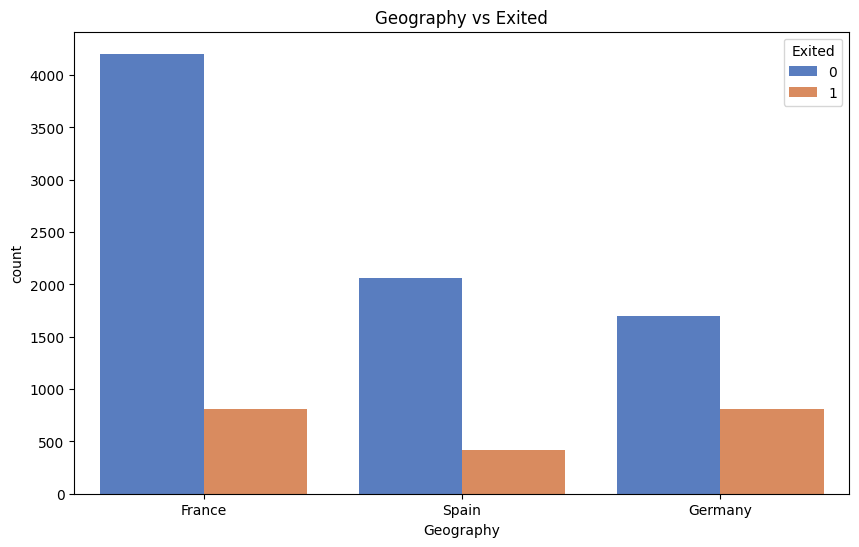

In [15]:
# Visualization for categorical variables (Geography) and Exited
plt.figure(figsize=(10, 6))
sns.countplot(x='Geography', hue='Exited', data=df, palette='muted')
plt.title('Geography vs Exited')
plt.show()

- The majority of customers are from France, with very few of them exiting (churning).
- Spain has fewer customers overall compared to France, and the number of churned customers is also low.
- Germany has a relatively smaller total customer count compared to France, but the churn rate is noticeably higher compared to the other countries.
- Churn is higher in Germany: Despite having fewer customers overall, Germany has a disproportionately higher number of churned customers compared to France and Spain.
- France and Spain have lower churn rates: Most customers in these countries tend to stay, indicating better customer satisfaction or engagement in these regions.

> Continue strategies that retain customers in France and Spain, as churn rates here are relatively low. Since churn is significantly higher in Germany, further investigation is needed to identify why customers in this region are leaving.

#### I. Analysis of Correlation Heatmap of Numerical Features

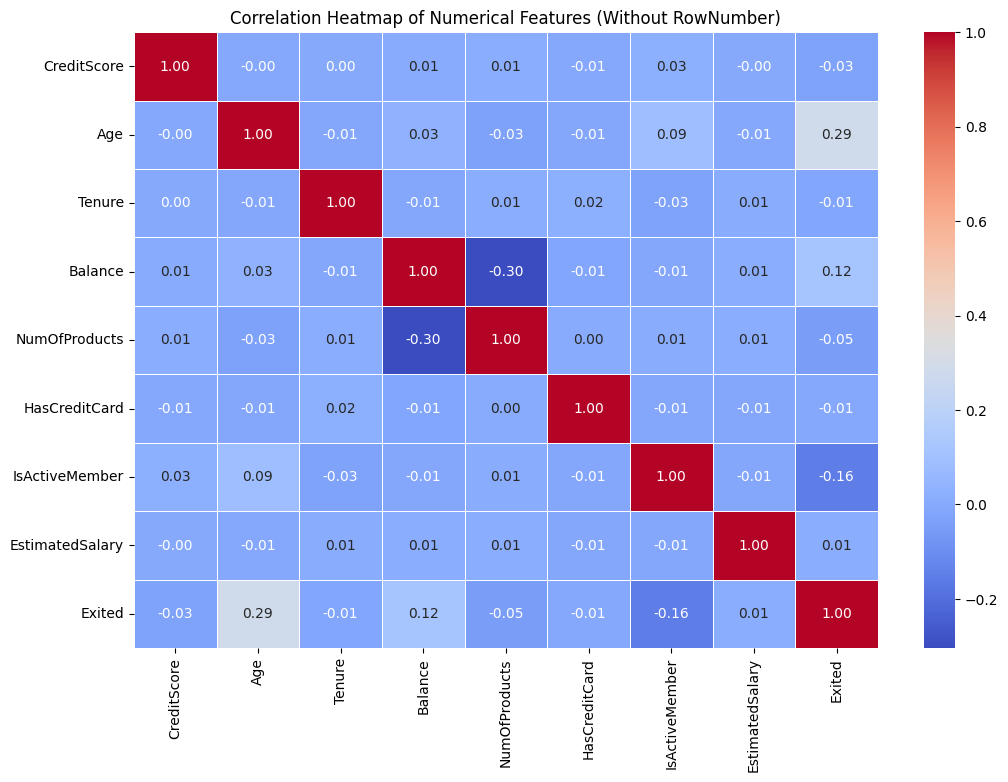

In [16]:
# Create a temporary copy of the data without the 'RowNumber' column for EDA
eda_data = df.drop(columns=['RowNumber', 'CustomerId'])

# Select only the numerical columns (excluding 'RowNumber') for correlation
numerical_data = eda_data.select_dtypes(include=['float64', 'int64'])

# Correlation between numerical features
correlation_matrix = numerical_data.corr()

# Visualize the heatmap for correlation between numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features (Without RowNumber)')
plt.show()


- The heatmap highlights correlations between numerical features in the dataset, including the target variable Exited.
- The strongest positive correlation with Exited is Age (0.29).
Older customers are more likely to churn compared to younger ones.
- There is a weak positive correlation between Balance and Exited (0.12), indicating customers with higher balances have a slightly higher tendency to churn.
- There is a negative correlation of -0.16 between IsActiveMember and Exited.
Customers who are active members are less likely to churn.
- A strong negative correlation (-0.30) exists between NumOfProducts and Balance. This suggests that customers with more products tend to have lower balances.
- Features like CreditScore, Tenure, HasCrCard, and EstimatedSalary show very weak correlations with Exited, indicating they are not strong predictors of churn individually.



### v. FEATURE ENGINEERING

First, define the X and y. Make the Exited column as the target. Drop unnecessary columns for X such as Exited (because it's the target itself), RowNumber (simply a row index that serves no predictive value and it is irrelevant to the churn prediction task and should be dropped), CustomerID ( It doesn't represent any meaningful feature about the customer's behavior so it can be dropped without impactiong the model's performance), and Surname (This is the customer's last name, which has no correlation with the likelihood of churn).

In [17]:
# Feature Selection: Drop unnecessary columns
X = df.copy()
X = X.drop(columns=['Exited', 'RowNumber', 'CustomerId', 'Surname'])

# Define the target variable (y)
y = df['Exited']

Define the feature and target as three categories which are numeric_feature, categorical_features, and binary_features. For features such as HasCreditCard and IsActiveMember have a numeric data type but are categorized as binary_features because the data content has been encoded into 0 and 1 as binary.

In [18]:
# Define the features (X) and target (y)
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
categorical_features = ['Geography', 'Gender']
binary_features = ['HasCreditCard', 'IsActiveMember'] 

---Cardinality Check

In [19]:
# Cardinality check and handling
for col in ['Geography', 'Gender']:
    cardinality = X[col].nunique()
    print(f"Cardinality of {col}: {cardinality}")

Cardinality of Geography: 3
Cardinality of Gender: 2


The cardinality check was performed only on contextual categorical columns, excluding binary columns. For the Geography and Gender columns, which have only 3 and 2 unique values respectively, this indicates low cardinality, so no handling is necessary.

----Split to train and test

The dataset is split into training (80%) and testing (20%) subsets using train_test_split. This ensures that the model is trained on one part of the data (X_train, y_train) and evaluated on a separate, unseen part (X_test, y_test). The random_state=42 parameter ensures reproducibility by producing the same split every time the code is run.

In [20]:
# Step: Train-Test Split
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

----Handling Missing Values

Check the missing values in X_train, X_test, y_train, y_test.

In [21]:
# Handling missing values (checked in X_train)
print("Missing values in training data:")
print(X_train.isnull().sum())

Missing values in training data:
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCreditCard      0
IsActiveMember     0
EstimatedSalary    0
dtype: int64


In [22]:
# Handling missing values (checked in X_test)
print("Missing values in training data:")
print(X_test.isnull().sum())

Missing values in training data:
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCreditCard      0
IsActiveMember     0
EstimatedSalary    0
dtype: int64


In [23]:
# Handling missing values (checked in X_train)
print("Missing values in training data:")
print(y_train.isnull().sum())

Missing values in training data:
0


In [24]:
# Handling missing values (checked in X_train)
print("Missing values in training data:")
print(y_test.isnull().sum())

Missing values in training data:
0


NO MISSING VALUES were found in X_train, X_test, y_train, or y_test, so there is no need for handling missing values.

----Handling Outlier

The code below uses IQR (Interquartile Range) and Z-Score methods to detect outliers in numerical features. It flags outliers without handling them (e.g., removing or modifying values). Adds binary columns (e.g., CreditScore_outlier) to indicate whether each row is an outlier for that feature. As the part of the output, a summary table showing the number of outliers detected by both methods for each feature.

Reason for only detecting outliers, no handling needed: 
- The dataset reflects real-world data about customers, with no human error or invalid entries. So the outliers are valid. I check it from the dataset itself.
- Removing or modifying outliers risks losing valuable data about unique customer behaviors, which could be significant for the churn prediction model.
- XGBoost as a model that I want to use is a tree-based algorithm that is inherently robust to outliers. It splits data into regions without being heavily influenced by extreme values.

Justification for those argument :
- Outliers often represent critical data points rather than errors, offering insights into unique behaviors or rare events (Aggarwal, C. C. (2015). Outlier Analysis. Springer)
- Real-world data often contains outliers that are legitimate and provide meaningful patterns for models. And for this cases, the churn customer dataset is likely a real world data (Hodge, V., & Austin, J. (2004). A survey of outlier detection methodologies. Artificial Intelligence Review, 22(2), 85-126)
- Tree-based algorithms like XGBoost are robust to outliers because splits depend on relative positioning rather than absolute values (Chen, T., & Guestrin, C. (2016). XGBoost: A scalable tree boosting system. Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining)

notes: the source of the justification is in brackets at each points.

In [25]:
# Function to detect outliers using both IQR and Z-Score methods
def detect_outliers(df, numeric_features, method="IQR"):
    """
    This function detects outliers in the dataset using either IQR or Z-Score method.

    Parameters:
    - df: DataFrame containing the data
    - numeric_features: List of numeric feature columns to check for outliers
    - method: Method used for outlier detection ("IQR" or "Z-Score")

    Returns:
    - df: DataFrame with additional columns indicating outliers for each numeric feature
    """
    for feature in numeric_features:
        if method == "IQR":
            # Calculate Q1, Q3, and IQR for IQR-based outlier detection
            Q1 = df[feature].quantile(0.25)
            Q3 = df[feature].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df[f'{feature}_outlier'] = (df[feature] < lower_bound) | (df[feature] > upper_bound)
        
        elif method == "Z-Score":
            # Calculate Z-Score for Z-Score-based outlier detection
            z_scores = zscore(df[feature].dropna())  # Drop NaN values to avoid errors
            threshold = 3  # Z-Score threshold to classify an outlier
            df[f'{feature}_outlier'] = np.abs(z_scores) > threshold

    return df

# Detect outliers using both IQR and Z-Score
df = detect_outliers(df, numeric_features, method="IQR")
df = detect_outliers(df, numeric_features, method="Z-Score")

# Display outliers detection result
print("Outliers detection result using IQR and Z-Score:")
outliers_summary = pd.DataFrame({
    'Feature': numeric_features,
    'IQR Outliers Count': [df[f'{feature}_outlier'].sum() for feature in numeric_features],
    'Z-Score Outliers Count': [df[f'{feature}_outlier'].sum() for feature in numeric_features]
})

print(outliers_summary)

# Display the first few rows of the outlier flags
print("\nFirst few rows of outlier flags:")
print(df[['CreditScore_outlier', 'Age_outlier', 'Tenure_outlier', 'Balance_outlier', 'NumOfProducts_outlier', 'EstimatedSalary_outlier']].head())


Outliers detection result using IQR and Z-Score:
           Feature  IQR Outliers Count  Z-Score Outliers Count
0      CreditScore                   8                       8
1              Age                 133                     133
2           Tenure                   0                       0
3          Balance                   0                       0
4    NumOfProducts                  60                      60
5  EstimatedSalary                   0                       0

First few rows of outlier flags:
   CreditScore_outlier  Age_outlier  Tenure_outlier  Balance_outlier  \
0                False        False           False            False   
1                False        False           False            False   
2                False        False           False            False   
3                False        False           False            False   
4                False        False           False            False   

   NumOfProducts_outlier  EstimatedSalary_o

- 8 outliers detected. Likely due to extremely high or low credit scores (it's valid outliers)
- 133 Outliers in Age may represent very young (18 years) or elderly customers (above 70), who might behave differently in banking services.
- 60 outliers in NumOfProducts. Customers with 3 or 4 products are flagged, as the majority use 1-2 products. No need to handling because it will change the information.
- All rows show False for the outlier flags, indicating that these customers have no extreme values for any features.

----Feature selection

This code below combines the features (X_train) and categorizes them into numeric_features, categorical_features, and binary_features, creating a structured DataFrame (X_train_combined) for analysis. It will be used for feature engineering steps by checking the correlation for numerical feature, categorical features, and binary features.

In [26]:
# Combine X_train and y for analysis
X_train_combined = pd.DataFrame(X_train, columns=numeric_features + categorical_features + binary_features)

First, calculates the ANOVA correlation p-values for numerical features in numeric_features by analyzing the variance between the feature values grouped by the target variable y_train. The results are stored in anova_results and printed to assess the significance of each feature's relationship with the target.

In [27]:
# ANOVA correlation for numerical features
anova_results = {}
for feature in numeric_features:
    groups = [X_train_combined[feature][y_train == val] for val in np.unique(y_train)]
    anova_results[feature] = f_oneway(*groups).pvalue

print("ANOVA Correlation Results (Numerical Features):")
print(anova_results)

ANOVA Correlation Results (Numerical Features):
{'CreditScore': np.float64(0.00875610792577869), 'Age': np.float64(2.1478401326183746e-147), 'Tenure': np.float64(0.23244928074774202), 'Balance': np.float64(2.222743685097366e-26), 'NumOfProducts': np.float64(5.003491171319526e-06), 'EstimatedSalary': np.float64(0.3301525927239536)}


Features with significant differences across target groups (low p-value) are likely to be more predictive and relevant for the model. 

Next step is to encode the categorical features in X_train_combined using LabelEncoder. Each feature's unique categories are converted into numerical labels, and the encoder for each feature is saved for future use.

In [28]:
# Encode categorical features
encoded_categorical_features = {}
for feature in categorical_features:
    le = LabelEncoder()
    X_train_combined[feature] = le.fit_transform(X_train_combined[feature])
    encoded_categorical_features[feature] = le  # Save encoder if needed later


This step calculates mutual information scores for categorical features selection, measuring their dependency on the target variable (y_train). The results indicate how informative each categorical feature is in predicting churn.

- Mutual information is used because it measures the dependency between categorical features and the target variable, capturing both linear and non-linear relationships, which helps identify the most informative features for prediction.

In [29]:
# Mutual information for categorical features
mutual_info_scores = mutual_info_classif(
    X_train_combined[categorical_features],
    y_train,
    discrete_features=True
)
mutual_info_results = dict(zip(categorical_features, mutual_info_scores))
print("Mutual Information Results (Categorical Features):")
print(mutual_info_results)

Mutual Information Results (Categorical Features):
{'Geography': np.float64(0.013456153013178124), 'Gender': np.float64(0.005649165960671304)}


This step calculates the point-biserial correlation to measure the strength and direction of the relationship between binary features and the target variable, helping to evaluate their relevance for prediction. The result will be used in feature selection.
-  Point-biserial correlation is chosen because it measures the linear relationship between a binary feature and a continuous or binary target, making it ideal for assessing the relevance of binary features in the context of churn prediction.

In [30]:
# Point-biserial correlation for binary features
binary_corr_results = {}
for feature in binary_features:
    correlation, _ = pointbiserialr(X_train_combined[feature], y_train)
    binary_corr_results[feature] = correlation

print("Point-Biserial Correlation Results (Binary Features):")
print(binary_corr_results)

Point-Biserial Correlation Results (Binary Features):
{'HasCreditCard': np.float64(-0.006471396152020638), 'IsActiveMember': np.float64(-0.1565604136661256)}


This step below selects the most relevant features for the model based on statistical thresholds: numerical features with ANOVA p-values < 0.05, categorical features with mutual information > 0.01, and binary features with point-biserial correlations > 0.1. All selected features are combined into a final list. The result are the final feature that will be used as selected_features

In [31]:
# Select features based on thresholds
selected_numeric_features = [feature for feature, pval in anova_results.items() if pval < 0.05]
selected_categorical_features = [feature for feature, score in mutual_info_results.items() if score > 0.01]
selected_binary_features = [feature for feature, corr in binary_corr_results.items() if abs(corr) > 0.1]

# Combine all selected features
selected_features = selected_numeric_features + selected_categorical_features + selected_binary_features
print("Selected Features:")
print(selected_features)

Selected Features:
['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'Geography', 'IsActiveMember']


This step applies the selected features to both X_train and X_test, retaining only the most relevant columns for further analysis and modeling.

In [32]:
# Apply feature selection to X_train and X_test
X_train_selected = X_train_combined[selected_features]
#X_test_selected = pd.DataFrame(X_test, columns=numeric_features + categorical_features + binary_features)[selected_features]
X_test_selected = X_test[selected_features]
print("Feature Selection Applied:")
print("Selected Features in Training Data:")
print(X_train_selected.head())

Feature Selection Applied:
Selected Features in Training Data:
      CreditScore  Age    Balance  NumOfProducts  Geography  IsActiveMember
9254          686   32       0.00              2          0               1
1561          632   42  119624.60              2          1               1
1670          559   24  114739.92              1          2               0
6087          561   27  135637.00              1          0               0
6669          517   56  142147.32              1          0               0


After the feature selection applied, the data containts CreditScore, Age, Balance, NumOfProducts, Geography, and IsActiveMember.

This step checks the shape of X_train and X_test after feature selection to confirm the dimensions of the reduced datasets is the same for the number of feature.

In [33]:
print(f"X_train shape after feature selection: {X_train_selected.shape}")
print(f"X_test shape after feature selection: {X_test_selected.shape}")

X_train shape after feature selection: (8000, 6)
X_test shape after feature selection: (2000, 6)


So, there will be 6 feature that will be use in the train modeling both in X train and X test. And the number of data X train is 8000. And the number of data X test is 2000.

----scaling for numerical features in X

Then, I make a custom scaler as a DynamicScaler Class that automatically applies either StandardScaler or MinMaxScaler to numerical features based on their skewnes:
- StandardScaler is used for features with normal distributions.
- MinMaxScaler is used for skewed features.

The class has two main methods:
- fit: Determines and fits the appropriate scaler for each feature (only apply for X_train).
- transform: Scales the features using the fitted scalers (for both X_train and X_test).

This ensures the numeric features are scaled appropriately, improving the model's performance by standardizing the input data.

In [34]:
# Step: Distribution-based scaling (StandardScaler for normal distribution, MinMaxScaler for skewed data)
# This class and function will choose the appropriate scaler based on skewness
class DynamicScaler(BaseEstimator, TransformerMixin):
    """
    A custom scaler that applies either StandardScaler or MinMaxScaler to the numeric features of the dataset 
    based on the skewness of each feature. StandardScaler is used for normally distributed features, 
    while MinMaxScaler is applied to skewed features.
    
    Attributes:
        scaler (dict): A dictionary mapping each numeric feature to its respective scaler.
    
    Methods:
        fit(X_train, y=None):
            Determines the appropriate scaler for each numeric feature based on its skewness and fits the scaler to the data.
        
        transform(X):
            Scales the numeric features using the previously fitted scalers and returns the transformed dataset.
    """
    def __init__(self):
        self.scaler = {}
    
    def fit(self, X_train, y=None):
        """
        Fits the appropriate scaler (StandardScaler or MinMaxScaler) to each numeric feature 
        based on its skewness. If the skewness is > 0.5, MinMaxScaler is used; 
        otherwise, StandardScaler is applied.
        
        Parameters:
        X_train:pd.DataFrame
            The training data containing the numeric features that need to be scaled.
        
        y:array-like, optional, default=None
            The target variable. Not used in this method, but included for compatibility with scikit-learn's fit method.
        
        Returns:
        self:object
            The fitted scaler instance, allowing for method chaining.
        """
        skewness = X_train.skew()
        for feature in numeric_features:
            if feature in X_train.columns:
                if abs(skewness[feature]) > 0.5:
                    self.scaler[feature] = MinMaxScaler()
                else:
                    self.scaler[feature] = StandardScaler()
                self.scaler[feature].fit(X[[feature]])
        return self
    
    def transform(self, X):
        """
        Transforms the dataset by scaling each numeric feature according to its fitted scaler.
        
        Parameters:
        X:pd.DataFrame
            The dataset to be transformed, containing the numeric features to scale.
        
        Returns:
        X_transformed:pd.DataFrame
            The transformed dataset where the numeric features have been scaled using the appropriate scaler.
        """
        X_transformed = X.copy()
        for feature in numeric_features:
            X_transformed[feature] = self.scaler[feature].transform(X[[feature]])
        return X_transformed

The code creates a preprocessing pipeline for numeric features, using the DynamicScaler to automatically scale each feature based on its distribution:
- StandardScaler for normally distributed features.
- MinMaxScaler for skewed features.

This ensures numeric data is scaled appropriately before being fed into the machine learning model.

In [35]:
# Create preprocessing pipeline for numeric features (scaling based on distribution)
scaler_pipeline = Pipeline([
    ('dynamic_scaler', DynamicScaler())  # Apply dynamic scaling based on skewness
])

This step updates numeric_features to include only the numeric features selected during the feature selection process.

In [36]:
# Update numeric_features to include only the selected numeric features
numeric_features = selected_numeric_features

This creates an updated preprocessing pipeline that scales selected numeric features, encodes selected categorical features, and passes through binary features without modification.

In [37]:
# Create the updated preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', scaler_pipeline, numeric_features),  # Updated numeric features
    ('cat', FunctionTransformer(lambda x: x.apply(LabelEncoder().fit_transform)), selected_categorical_features),  # Encode categorical features
    ('binary', 'passthrough', selected_binary_features)
])

Next, the preprocessor is applied to fit and transform X_train_selected and transform X_test_selected. Fit only for X_train. The shapes of the processed datasets are displayed to confirm successful preprocessing.

In [38]:
# Fit the preprocessor on X_train_selected and transform both datasets
X_train_processed = preprocessor.fit_transform(X_train_selected)
X_test_processed = preprocessor.transform(X_test_selected)

# Check the shapes after preprocessing
print(f"X_train_processed shape: {X_train_processed.shape}")
print(f"X_test_processed shape: {X_test_processed.shape}")


X_train_processed shape: (8000, 6)
X_test_processed shape: (2000, 6)


### vi. MODEL DEFINITION

In this section, I defines a dictionary of machine learning models with their default parameters, which will be used as baseline models for comparison:
- KNN: K-Nearest Neighbors classifier.
- SVM: Support Vector Machine classifier.
- DecisionTree: Decision Tree classifier with a fixed random state for reproducibility.
- RandomForest: Random Forest classifier with a fixed random state.
- XGBoost: Extreme Gradient Boosting classifier configured for multi-log loss evaluation.

These models will be trained and evaluated to identify the best-performing algorithm for predicting customer churn.

In [39]:
# Step: Model Definitions (using default parameters, baseline model)
models = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, random_state=42)
}

I define a function that creates a pipeline that combines the preprocessing steps (preprocessor) with a specified machine learning model (classifier). It ensures the data is preprocessed and passed directly into the model for training and prediction, streamlining the workflow.

In [40]:
# Create pipeline with preprocessing and model
def create_pipeline(model):
    return Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

### vii. MODEL TRAINING AND MODEL EVALUATION

Then, I make a code to trains and evaluate each machine learning model in the models dictionary using the preprocessing pipeline and stores the trained pipelines in the trained_models dictionary. It ensures each model is trained with the same preprocessing steps applied to the data.

- Model training: The code trains multiple models defined in the models dictionary using a pipeline that includes preprocessing and model training. Trained models are stored in the trained_models dictionary with the model name as the key.
- The evaluation metric used is the F1-score, which balances precision and recall, suitable for imbalanced datasets like churn prediction. The mean and standard deviation of the F1-scores across the folds are calculated and printed.

why do I choose f-1 score metrics for model evaluation?
- Metrics like accuracy can be misleading, as a model predicting "no churn" for all instances could still achieve high accuracy despite failing to identify actual churners
- The F1-score is the harmonic mean of precision and recall, ensuring that both false positives (predicting churn when it didn’t occur) and false negatives (failing to predict actual churn) are accounted for. For churn, precision ensures targeted efforts on customers likely to churn, and recall ensures that most churners are identified.
- False negatives (missed churners) lead to customer loss, impacting revenue. False positives (predicting churn incorrectly) might waste resources on unnecessary retention strategies. F1-score balances these outcomes, optimizing both retention efforts and costs.
- The F1-score is ideal for binary classification problems like churn, where identifying the minority class (churners) is critical.

> By using the F1-score, it ensure the model's predictions are both effective and efficient in addressing the business goal of retaining customers.

In [41]:
# Train and Evaluate Models
trained_models = {}
for name, model in models.items():
    pipeline = create_pipeline(model)

    # Train the model
    pipeline.fit(X_train_selected, y_train)
    trained_models[name] = pipeline

    # Evaluate the model using cross-validation
    cv_results = cross_validate(pipeline, X_train_selected, y_train, cv=5, scoring='f1', return_train_score=False)
    print(f"{name} - Cross-Validation Results:")
    print(f"Mean: {np.mean(cv_results['test_score']):.4f}")
    print(f"Standard Deviation: {np.std(cv_results['test_score']):.4f}")

    # Predict on test data
    y_pred = pipeline.predict(X_test_selected)
    print(f"{name} - Classification Report:")
    print(classification_report(y_test, y_pred))
    print("=" * 80)

KNN - Cross-Validation Results:
Mean: 0.4313
Standard Deviation: 0.0234
KNN - Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1607
           1       0.65      0.36      0.47       393

    accuracy                           0.84      2000
   macro avg       0.75      0.66      0.68      2000
weighted avg       0.82      0.84      0.82      2000

SVM - Cross-Validation Results:
Mean: 0.2566
Standard Deviation: 0.0232
SVM - Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      1607
           1       0.84      0.16      0.27       393

    accuracy                           0.83      2000
   macro avg       0.84      0.58      0.59      2000
weighted avg       0.83      0.83      0.78      2000

DecisionTree - Cross-Validation Results:
Mean: 0.4951
Standard Deviation: 0.0210
DecisionTree - Classification Report:
              precision  

I make a code to evaluates each model by performing 5-fold cross-validation and calculates the mean recall and standard deviation for each model that has been defined in the model definition section. It then trains the models on the full training dataset, makes predictions on the test data, and prints a classification report to summarize the performance. This process helps compare the models to identify the best one for the task.


- Model using KNN:
    - F1-Score (Class 1): 0.47 - quite high
    - Moderate precision (65%) but very low recall (36%) indicates the model struggles to identify actual churners.
    - High false negatives reduce its reliability for churn prediction.
- Model using SVM:
    - F1-Score (Class 1): 0.27 - the lowest 
    - Extremely low recall (16%) means most churners are missed, even though precision is high (84%).
    - This makes the model unsuitable for churn prediction as it fails to capture the minority class effectively.
- Decision Tree:
    - F1-Score (Class 1): 0.52 - quite hight, higher than KNN and SVM
    - Balanced recall (53%) and precision (51%), but both are still relatively low.
    - Performs better than SVM and KNN for churn but lacks robustness.
- Random Forest:
    - F1-Score (Class 1): 0.58 - higher than the previous model
    - Improved precision (69%) and recall (50%) compared to simpler models.
    - Shows better performance in identifying churners while maintaining decent accuracy for the minority class.
- XGBoost:
    - F1-Score (Class 1): 0.60 - the highest beetwen other model
    - Best performance among all models, with precision (72%) and recall (51%) demonstrating a better trade-off.
    - Handles class imbalance more effectively, making it a reliable option for churn prediction.
- XGBoost achieves the highest F1-Score for class 1 (churn), showing its capability to balance precision and recall for the minority class.
- Random Forest is a close second and could also be considered for further tuning.
- SVM and KNN fail to capture churners effectively, making them less suitable for this problem.
- Focusing on models like XGBoost or Random Forest and enhancing their performance (e.g., through hyperparameter tuning) is recommended for accurate churn prediction

> **The Benefit of using XGBoost Model:**
    XGBoost is a powerful model that can handle large datasets with diverse features and outliers without requiring manual adjustments. This is particularly useful in the banking domain, where data variability such as differences in age, balance, or number of products plays a crucial role in understanding customer behavior and predicting churn effectively.

This code below is to prepare and train a pipeline using the XGBoost model:
- Model Selection: Retrieves the XGBoost model from the pre-defined models dictionary.
- Pipeline Creation: Combines preprocessing steps (preprocessor) with the XGBoost classifier into a single pipeline called pipeline_base_model.
- Model Training: Fits the pipeline on the training data (X_train_selected and y_train).
- Predictions: Generates predictions for both the training (y_train_pred) and test data (y_test_pred).

This step sets up the XGBoost model as a baseline before performing hyperparameter tuning.

In [42]:
# Step before hyperparameter tuning
# Get the XGBoost model from the 'models' dictionary
xgboost_model = models['XGBoost']

# Create pipeline with preprocessing and XGBoost classifier
pipeline_base_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgboost_model)
])

# Fit the pipeline on the training data
pipeline_base_model.fit(X_train_selected, y_train)

# Predictions on training data
y_train_pred = pipeline_base_model.predict(X_train_selected)

# Predictions on test data
y_test_pred = pipeline_base_model.predict(X_test_selected)

Next, evaluates the model's performance on the training data by calculating:
    - Accuracy: The percentage of correct predictions.
    - F1-Score: A balance between precision and recall.
    - Confusion Matrix: A detailed breakdown of predictions versus actual values.

It provides insight into how well the model fits the training data.

In [43]:
# Metrics for Training Data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"F1-Score: {train_f1:.4f}")
print("Confusion Matrix (Training):")
print(confusion_matrix(y_train, y_train_pred))
print("=" * 80)

Training Metrics:
Accuracy: 0.9290
F1-Score: 0.8056
Confusion Matrix (Training):
[[6255  101]
 [ 467 1177]]


This code below is to evaluate the model's performance on the test data like I do previously in training data.

In [44]:
# Metrics for Test Data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
print("Test Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"F1-Score: {test_f1:.4f}")
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))
print("=" * 80)

Test Metrics:
Accuracy: 0.8645
F1-Score: 0.5961
Confusion Matrix (Test):
[[1529   78]
 [ 193  200]]


Insight from metrics both in training and testing data:
- Accuracy:
    - Training accuracy: 92.90%
    - Test accuracy: 86.45%
    - There is a slight decrease (~6.45%), but it is still within reasonable limits. This indicates that the model is not too overfitting.
- F1-Score:
    - Training F1-Score: 0.8056
    - Test F1-Score: 0.5961
    - The decrease in F1-Score from training to test is quite significant (~20.95%). This may indicate that the model still has some signs of overfitting, especially in the prediction of minority classes or data that was not seen during training.
- The model was able to achieve a test set accuracy of 86.45%, which indicates quite good generalization to new data. However, the lower test set F1-Score (0.5961) indicates that the model may be less than optimal for handling positive class predictions (200/393).
- The model is quite good, but has slight signs of overfitting, especially seen from the decrease in F1-Score on the test set.

> The model likely overfits the training data. Further actions like hyperparameter tuning, addressing class imbalance (e.g. SMOTE), or simplifying the model may help improve generalization.

### viii. HYPERPARAMETER TUNING FOR BEST MODEL WITH TRAIN AND EVALUATION

From previous step, we got that XGBoost is the best model to use in this context based on the results of model evaluation and analysis. To optimize the performances from the best model,  performs hyperparameter tuning for the XGBoost model using SMOTE and GridSearchCV with 5-fold cross-validation. It tests different combinations of parameters (e.g. learning rate, depth, estimators) to find the optimal configuration.
- Best Parameters: The most effective hyperparameters are identified and displayed.
- Model Evaluation: The tuned model is evaluated on the test set, and a classification report is printed.
- Cross-Validation Results: The mean and standard deviation of recall from the cross-validation process are calculated and shown.

This step ensures the model is fine-tuned for maximum performance in identifying churned customers.

First, a pipeline is created that integrates SMOTE for oversampling the minority class, preprocessing steps (scaling, encoding, and feature selection), and the XGBoost model for training and prediction.

In [45]:
# Define SMOTE for oversampling
smote = SMOTE(random_state=42)

In [46]:
# Define the pipeline for XGBoost with SMOTE
pipeline_smote_model = ImbPipeline([
    ('smote', smote),                   # SMOTE for oversampling
    ('preprocessor', preprocessor),    # Preprocessing steps (scaling, encoding, feature selection)
    ('classifier', xgboost_model)      # XGBoost model
])

A parameter grid is defined to explore different hyperparameter combinations for the XGBoost model, including learning rate, max depth, number of estimators, subsample ratio, and column sampling by tree.

In [47]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 4, 5],
    'classifier__n_estimators': [100, 200],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0],
}


Then, GridSearchCV is set up to tune the XGBoost model within a pipeline using SMOTE for oversampling, evaluating combinations of hyperparameters based on the F1-score metric with 5-fold cross-validation.

In [48]:
# Define the scoring metric
scoring_metric = make_scorer(f1_score)

# Perform GridSearchCV with SMOTE
grid_search_smote = GridSearchCV(
    estimator=pipeline_smote_model,
    param_grid=param_grid,
    scoring=scoring_metric,
    cv=5,
    n_jobs=-1
)

The pipeline with SMOTE and GridSearchCV is fitted to the training data to find the best hyperparameters for the XGBoost model.

In [49]:
# Fit the pipeline with SMOTE and GridSearchCV
grid_search_smote.fit(X_train_selected, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('dynamic_scaler',
                                                                                          DynamicScaler())]),
                                                                         ['CreditScore',
                                                                          'Age',
                                                                          'Balance',
                                                                          'NumOfProducts']),
                                                                        ('cat',
                                                                         FunctionTransformer(func=<function <lambda> at 0x0000026AE49B6F70>),
                                                                         ['Geography']),
                                                                        ('binary',
                                                                         'passthrough',
                                                                         ['IsA...
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'classifier__colsample_bytree': [0.8, 1.0],
                         'classifier__learning_rate': [0.01, 0.1, 0.2],
                         'classifier__max_depth': [3, 4, 5],
                         'classifier__n_estimators': [100, 200],
                         'classifier__subsample': [0.8, 1.0]},
             scoring=make_scorer(f1_score, response_method='predict'))

The best hyperparameters from GridSearchCV are retrieved, and the optimized model is used to make predictions on the test data.

In [50]:
# Get the best parameters and estimator
best_params = grid_search_smote.best_params_
print(f"Best Parameters: {best_params}")

# Predict on the test data
y_test_pred = grid_search_smote.best_estimator_.predict(X_test_selected)

Best Parameters: {'classifier__colsample_bytree': 1.0, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 4, 'classifier__n_estimators': 200, 'classifier__subsample': 0.8}


The model's performance on the training data is evaluated after applying SMOTE and hyperparameter tuning, showing accuracy, F1-score, confusion matrix, and a detailed classification report.

In [51]:
# Metrics for Train Data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
print("Train Metrics After SMOTE and Hyperparameter Tuning:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"F1-Score: {train_f1:.4f}")
print("Confusion Matrix (Train):")
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

Train Metrics After SMOTE and Hyperparameter Tuning:
Accuracy: 0.9290
F1-Score: 0.8056
Confusion Matrix (Train):
[[6255  101]
 [ 467 1177]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      6356
           1       0.92      0.72      0.81      1644

    accuracy                           0.93      8000
   macro avg       0.93      0.85      0.88      8000
weighted avg       0.93      0.93      0.93      8000



The same evaluation also done for the testing data.

In [52]:
# Metrics for Test Data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
print("Test Metrics After SMOTE and Hyperparameter Tuning:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"F1-Score: {test_f1:.4f}")
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Test Metrics After SMOTE and Hyperparameter Tuning:
Accuracy: 0.8145
F1-Score: 0.6049
Confusion Matrix (Test):
[[1345  262]
 [ 109  284]]
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      1607
           1       0.52      0.72      0.60       393

    accuracy                           0.81      2000
   macro avg       0.72      0.78      0.74      2000
weighted avg       0.85      0.81      0.82      2000



After applying SMOTE and hyperparameter tuning to XGBoost model, we got that:
- In training data:
    - F1-Score (0.8056): The model performs well on the training data, with a strong balance between precision and recall for both classes.
    - Class 0 (Non-Churn): High precision and recall indicate the model effectively predicts non-churn customers.
    - Class 1 (Churn): Lower recall (0.72) compared to precision (0.92) suggests the model struggles slightly to identify all churn cases.
- In test data:
    - F1-Score (0.6049): The test F1-score is significantly lower than the training F1-score, indicating some overfitting (but, i can say it a good fit though).
    - Class 0 (Non-Churn): The model maintains high precision (0.93) but slightly lower recall (0.84), showing reliability in identifying non-churn customers.
    - Class 1 (Churn): Recall (0.72) for churn cases on the test set improves compared to precision (0.52), suggesting better identification of churners, albeit with some false positives.

BEFORE VS AFTER SMOTE AND HYPERPARAMETER TUNING WITH XGBOOST:
- BEFORE: The training F1-score (0.8056) indicates the model performed well on the training data. The test F1-score (0.5961) shows a significant drop, suggesting overfitting, where the model struggles to generalize well to unseen data.
- AFTER: Training F1-score remains the same (0.8056), indicating that oversampling and hyperparameter optimization did not compromise performance on the training data. The test F1-score improves slightly to 0.6049, showing better generalization to the test set. However, the improvement is modest, and the performance gap between training and test scores remains.
- While SMOTE addresses class imbalance by improving the model's ability to identify churn cases (Class 1), the improvement is limited.
- The F1-score increase on the test data (from 0.5961 to 0.6049) suggests a slight improvement in balancing precision and recall for churn predictions.
- The class imbalance and limited improvement highlight the challenge of predicting churn accurately

> In conclusion, while the overall improvements are small after hyperparameter tuning, they are still valuable in churn prediction. The insights can guide retention strategies but should be combined with other customer insights for better targeting.


> **Other benefits from the model:** SMOTE effectively balances the dataset, ensuring the model learns patterns for minority class (churn cases), reducing bias towards the majority class (non-churn). The test F1-score improved slightly after tuning (from 0.5961 to 0.6049), indicating better generalization in identifying churn cases.

>**Other benefits from the model:** XGBoost inherently handles multicollinearity, missing values, and outliers well, which aligns with the business goal of churn prediction. Hyperparameter tuning optimizes the model's parameters, improving its ability to handle complex patterns in the data effectively.

> **The limitation from this model:** Despite SMOTE and tuning, the increase in test F1-score was marginal. This suggests that further optimization or advanced techniques might be required.

> **Disadvantage of this model:** Prioritizing the F1-score might lead to trade-offs in other metrics like precision or recall, which could impact specific business goals. SMOTE generates synthetic data, which might not perfectly represent real-world customer behavior, potentially introducing noise into the dataset.

### ix. MODEL SAVING

In this section, we saves the full pipeline (including preprocessing steps and the best XGBoost model) into a file using cloudpickle. It also stores the model's best parameters and type in a JSON file for reference.
- Combines preprocessing and the best-tuned XGBoost model into a single pipeline and saves it as xgboost_smote_pipeline.pkl
- Saves the best parameters and model type in xgboost_model_info.json

In [53]:
# Define the file paths for saving
model_save_path = "xgboost_smote_pipeline.pkl"
model_info_path = "xgboost_model_info.json"

# Save the full pipeline (preprocessing + SMOTE + best model)
with open(model_save_path, 'wb') as model_file:
    cloudpickle.dump(grid_search_smote.best_estimator_, model_file)

# Save model information such as best parameters and performance metrics
model_info = {
    'best_parameters': best_params,  # Best parameters from GridSearchCV
    'train_accuracy': train_accuracy,
    'train_f1': train_f1,
    'test_accuracy': test_accuracy,
    'test_f1': test_f1,
    'model_type': 'XGBoost with SMOTE'
}

# Save model information in JSON format
with open(model_info_path, 'w') as info_file:
    json.dump(model_info, info_file)

print(f"Model saved at {model_save_path}")
print(f"Model information saved at {model_info_path}")

Model saved at xgboost_smote_pipeline.pkl
Model information saved at xgboost_model_info.json


>**Other benefit of using this model:** A pipeline that includes preprocessing and models makes deployment easy, allowing teams to automatically predict on new data without additional steps. We can see the full pipeline from the model in the code at the first line that combine preprocessing and model into a single pipeline.

The model-saving step has been successfully executed. From the file we are saving, it allows us to directly use the pipeline for inference or predictions on new data without separately applying preprocessing. The .pkl file containts preprocessing steps (scaling, encoding, handling binary features) and the best-tuned XGBoost model. The .json file containts useful documentation for sharing with stakeholders or revisiting the process later.



### x. MODEL INFERENCE

I have successfully applied a trained model to make predictions about customer churn based on features provided in the dataset. The model was built and trained using various classifiers, and we used the entire preprocessing pipeline (including scaling, encoding, and imputation) along with the trained model to predict whether a customer is likely to churn or not. From two data_inf I use to test the model inference to predict the churn of customer, the model's prediction results are binary: either the customer is predicted to churn (1) or not (0). In this case, the churn prediction is useful for customer retention strategies. For Customer 1, the model predicts they will stay (No Churn), while Customer 2 is predicted to leave (Churn).

### xi. SUMMARY

Improvement for the model:
- Add features like customer satisfaction scores, customer feedback, or recent activity trends to capture more business context.
- Test the model on data from different time periods to ensure generalizability in the face of changing customer behavior.
- Use more advanced resampling techniques to generate synthetic data closer to the real distribution or to eliminate noise and borderline cases.
- Explore techniques like threshold adjustments to improve recall for the positive class. Analyze the ROC curve to find the optimal threshold for maximizing recall while balancing false positives.

> By implementing these improvements, the churn prediction model can achieve higher accuracy, better generalization, and actionable insights, helping the bank target at-risk customers more effectively and improve retention strategies.

The machine learning model built, particularly the tuned XGBoost model, has successfully achieved the objectives outlined in the introduction. Here's how it aligns with the stated goals:
- The objectives of building an effective machine learning model to predict customer churn and enabling early interventions were successfully addressed. Among the five models (KNN, SVC, Decision Tree, Random Forest, and XGBoost), XGBoost with SMOTE and hyperparameter tuning demonstrated the best balance between precision and recall, achieving a Test F1-Score of 0.605.

- The use of the F1 Score as the primary evaluation metric effectively captured the model's ability to balance false positives and false negatives, crucial for handling the dataset's imbalance. Cross-validation ensured model robustness, with stable performance across folds.

- The application of SMOTE improved class balance, helping the model better identify churn cases. Additionally, GridSearchCV optimized XGBoost hyperparameters, further enhancing recall without overly sacrificing precision.

- These results align with the objective of equipping bank management, marketing teams, and analysts with actionable insights to proactively target at-risk customers, improve retention strategies, and reduce financial losses from customer churn. Further improvements can focus on fine-tuning recall for identifying more churners while balancing resource allocation.

### xii. CONCEPTUAL PROBLEM

#### 1. Explain the background of bagging and how bagging works!
Bagging stands for Bootstrap Aggregating, a technique used to improve the performance of machine learning models by reducing their variance and overfitting. The main goal of bagging is to increase the stability and accuracy of a machine learning model, particularly for algorithms that have high variance, such as decision trees.

How Bagging Works:
- Create Random Subsets: From the original dataset, create several random subsets of the data (with replacement). This means some data points appear more than once, while others may not appear at all.
- Then, Train Models on Subsets: Each subset of data trains its own model (like a decision tree). These models learn slightly different patterns because they see different data.
- Continued with Combine Predictions: For classification, the final prediction is based on a majority vote from all models. For regression, the predictions are averaged.
- Lastly, Reduce Overfitting: By combining predictions from different models, bagging helps reduce overfitting and makes the final prediction more reliable.

#### 2. Explain the difference in how the Random Forest algorithm works and the boosting algorithm you chose (XGBoosting)!
- Random Forest builds multiple trees independently and combines predictions via voting for classification. Each tree has equal opportunity to predict without considering previous errors.
- XGBoost builds trees sequentially and gives more weight to errors made by previous trees. Each new tree aims to correct those errors, improving the model iteratively.
- Random Forest combines results from all trees through majority voting.
- XGBoost corrects previous errors and combines predictions more complexly, optimizing the weight of each new tree.
- XGBoost tends to achieve higher accuracy than Random Forest, especially on complex and varied data, as it focuses on correcting mistakes. Random Forest is more robust but doesn't focus on errors.
- Random Forest is more resistant to overfitting, as trees are built independently, reducing the risk of focusing on specific errors. XGBoost is more prone to overfitting if not tuned properly, as each tree is built to fix previous mistakes.


#### 3. Explain what is meant by Cross Validation!
Cross-validation is a technique used to evaluate how well a machine learning model performs on unseen data. The main goal is to ensure that the model doesn’t just perform well on the training data but also on new, unseen data that might be more representative of real-world scenarios.

The process works by splitting the data into several parts (folds), usually 5 or 10. Each fold takes turns being used as the test set, while the remaining folds are used to train the model. This is repeated several times, and the evaluation results from each round are averaged. This gives a more accurate understanding of the model’s performance, rather than relying on just one random split of the data.

In this case, cross-validation is used to evaluate the performance of various models like KNN, SVM, Decision Tree, Random Forest, and XGBoost using the training data (X_train and y_train). It helps to choose the best model before testing it on the test data (X_test).

By using cross-validation, we get a better understanding of how stable and reliable the model is under different conditions, and it helps prevent overfitting, where a model performs exceptionally well on training data but poorly on new, unseen data.

### xiii. DEPLOYMENT

It successfully deployed to huggingface. You can visit the link below:
- url deployment = https://huggingface.co/spaces/Ntsany/Churn-BankCustomer-Prediction